In [39]:
#Libraries
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from sklearn_evaluation import plot
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
#Data is from https://www.kaggle.com/competitions/customer-churn-prediction-2020/overview
data = pd.read_csv('train.csv')
data

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,MT,83,area_code_415,no,no,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,no
4246,WV,73,area_code_408,no,no,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,no
4247,NC,75,area_code_408,no,no,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,no
4248,HI,50,area_code_408,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,no


In [41]:
data.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [42]:
#Object data
data.describe(include='O')

,state,area_code,international_plan,voice_mail_plan,churn
count,4250,4250,4250,4250,4250
unique,51,3,2,2,2
top,WV,area_code_415,no,no,no
freq,139,2108,3854,3138,3652


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [44]:
#Seperating the categorical and continuous variables and removing unnecessary columns
data.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

In [45]:
# categ_columns = []
# for col in data.columns:
#     if data[col].nunique()<10:
#         categ_columns.append(col) 
        
# print('categ numericals columns are {}'.format(categ_columns))
# Num_cols = ['number_vmail_messages' ,'total_day_minutes' ,'total_day_calls',
#        'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
#        'total_eve_charge', 'total_night_minutes', 'total_night_calls',
#        'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
#        'total_intl_charge' ]
# print('nums numericals columns are {}'.format(Num_cols))

In [46]:
data.nunique().sort_values()

churn                               2
international_plan                  2
voice_mail_plan                     2
area_code                           3
number_customer_service_calls      10
total_intl_calls                   21
number_vmail_messages              46
state                              51
total_day_calls                   120
total_eve_calls                   123
total_night_calls                 128
total_intl_minutes                168
total_intl_charge                 168
account_length                    215
total_night_charge                992
total_eve_charge                 1572
total_night_minutes              1757
total_eve_minutes                1773
total_day_charge                 1843
total_day_minutes                1843
dtype: int64

In [47]:
data.churn.value_counts()

no     3652
yes     598
Name: churn, dtype: int64

In [48]:
#Encoding the categorical features

#International plan
data.international_plan.replace(['no', 'yes'], [0, 1], inplace=True)

#Voice mail plan
data.voice_mail_plan.replace(['no', 'yes'], [0, 1], inplace=True)

#churn 
data.churn.replace(['no', 'yes'], [0, 1], inplace=True)

In [49]:
data

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,NJ,137,area_code_415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,OH,84,area_code_408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,OK,75,area_code_415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,MA,121,area_code_510,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,MT,83,area_code_415,0,0,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,0
4246,WV,73,area_code_408,0,0,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,0
4247,NC,75,area_code_408,0,0,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,0
4248,HI,50,area_code_408,0,1,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,0


In [51]:
data = pd.get_dummies(data,prefix='',prefix_sep='', columns = ['area_code'])
data

,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,...,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,area_code_408,area_code_415,area_code_510
0,OH,107,0,1,26,161.6,123,27.47,195.5,103,...,103,11.45,13.7,3,3.70,1,0,0,1,0
1,NJ,137,0,0,0,243.4,114,41.38,121.2,110,...,104,7.32,12.2,5,3.29,0,0,0,1,0
2,OH,84,1,0,0,299.4,71,50.90,61.9,88,...,89,8.86,6.6,7,1.78,2,0,1,0,0
3,OK,75,1,0,0,166.7,113,28.34,148.3,122,...,121,8.41,10.1,3,2.73,3,0,0,1,0
4,MA,121,0,1,24,218.2,88,37.09,348.5,108,...,118,9.57,7.5,7,2.03,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,MT,83,0,0,0,188.3,70,32.01,243.8,88,...,79,9.62,10.3,6,2.78,0,0,0,1,0
4246,WV,73,0,0,0,177.9,89,30.24,131.2,82,...,89,8.38,11.5,6,3.11,3,0,1,0,0
4247,NC,75,0,0,0,170.7,101,29.02,193.1,126,...,104,5.81,6.9,7,1.86,1,0,1,0,0
4248,HI,50,0,1,40,235.7,127,40.07,223.0,126,...,116,13.39,9.9,5,2.67,2,0,1,0,0


In [52]:
#Categorical encoding uing hashing encoder
ce_hashing = ce.HashingEncoder(cols='state')
data = ce_hashing.fit_transform(data)
data

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,account_length,international_plan,...,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,area_code_408,area_code_415,area_code_510
0,0,0,0,0,1,0,0,0,107,0,...,103,11.45,13.7,3,3.70,1,0,0,1,0
1,0,1,0,0,0,0,0,0,137,0,...,104,7.32,12.2,5,3.29,0,0,0,1,0
2,0,0,0,0,1,0,0,0,84,1,...,89,8.86,6.6,7,1.78,2,0,1,0,0
3,0,0,0,0,1,0,0,0,75,1,...,121,8.41,10.1,3,2.73,3,0,0,1,0
4,0,0,0,0,1,0,0,0,121,0,...,118,9.57,7.5,7,2.03,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,0,0,1,0,0,0,0,0,83,0,...,79,9.62,10.3,6,2.78,0,0,0,1,0
4246,0,0,0,0,0,0,1,0,73,0,...,89,8.38,11.5,6,3.11,3,0,1,0,0
4247,1,0,0,0,0,0,0,0,75,0,...,104,5.81,6.9,7,1.86,1,0,1,0,0
4248,0,0,0,0,0,0,1,0,50,0,...,116,13.39,9.9,5,2.67,2,0,1,0,0


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   col_0                          4250 non-null   int64  
 1   col_1                          4250 non-null   int64  
 2   col_2                          4250 non-null   int64  
 3   col_3                          4250 non-null   int64  
 4   col_4                          4250 non-null   int64  
 5   col_5                          4250 non-null   int64  
 6   col_6                          4250 non-null   int64  
 7   col_7                          4250 non-null   int64  
 8   account_length                 4250 non-null   int64  
 9   international_plan             4250 non-null   int64  
 10  voice_mail_plan                4250 non-null   int64  
 11  number_vmail_messages          4250 non-null   int64  
 12  total_day_minutes              4250 non-null   f

In [62]:
y = data['churn']
x = data.drop(['churn'],axis='columns')

In [63]:
#Train and test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 121)

In [64]:
x

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,account_length,international_plan,...,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,area_code_408,area_code_415,area_code_510
0,0,0,0,0,1,0,0,0,107,0,...,254.4,103,11.45,13.7,3,3.70,1,0,1,0
1,0,1,0,0,0,0,0,0,137,0,...,162.6,104,7.32,12.2,5,3.29,0,0,1,0
2,0,0,0,0,1,0,0,0,84,1,...,196.9,89,8.86,6.6,7,1.78,2,1,0,0
3,0,0,0,0,1,0,0,0,75,1,...,186.9,121,8.41,10.1,3,2.73,3,0,1,0
4,0,0,0,0,1,0,0,0,121,0,...,212.6,118,9.57,7.5,7,2.03,3,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,0,0,1,0,0,0,0,0,83,0,...,213.7,79,9.62,10.3,6,2.78,0,0,1,0
4246,0,0,0,0,0,0,1,0,73,0,...,186.2,89,8.38,11.5,6,3.11,3,1,0,0
4247,1,0,0,0,0,0,0,0,75,0,...,129.1,104,5.81,6.9,7,1.86,1,1,0,0
4248,0,0,0,0,0,0,1,0,50,0,...,297.5,116,13.39,9.9,5,2.67,2,1,0,0


In [65]:
y

0       0
1       0
2       0
3       0
4       0
       ..
4245    0
4246    0
4247    0
4248    0
4249    0
Name: churn, Length: 4250, dtype: int64

In [66]:
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

x_train (3400, 28)
x_test (850, 28)
y_train (3400,)
y_test (850,)


In [67]:
#Checking for imbaalance
y_train.value_counts()

0    2928
1     472
Name: churn, dtype: int64

In [68]:
oversample = SMOTE()
x_train, y_train = oversample.fit_resample(x_train, y_train)

In [69]:
#Checking for imbaalance
y_train.value_counts()

0    2928
1    2928
Name: churn, dtype: int64

In [70]:
#Proceeding with normalization
train_scaler = StandardScaler()

In [71]:
norm_x_train = pd.DataFrame(train_scaler.fit_transform(x_train),
                                   index=x_train.index, columns=x_train.columns)
norm_x_train

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,account_length,international_plan,...,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,area_code_408,area_code_415,area_code_510
0,-0.330289,-0.367864,-0.221554,3.759226,-0.347513,-0.1895,-0.336298,-0.252508,-0.069069,-0.314144,...,-0.943685,-0.123436,-0.945504,-0.268339,-1.318889,-0.267659,0.220715,-0.462254,1.273766,-0.454890
1,-0.330289,-0.367864,-0.221554,-0.266012,-0.347513,-0.1895,2.973553,-0.252508,-1.147784,-0.314144,...,-0.593547,0.569092,-0.592666,-0.114439,-0.898132,-0.110897,-0.484801,-0.462254,1.273766,-0.454890
2,-0.330289,-0.367864,-0.221554,-0.266012,2.877587,-0.1895,-0.336298,-0.252508,-0.174309,-0.314144,...,-0.267837,0.835449,-0.266969,1.886254,-0.056618,1.884256,-0.484801,-0.462254,-0.785073,2.198333
3,3.027650,-0.367864,-0.221554,-0.266012,-0.347513,-0.1895,-0.336298,-0.252508,0.351893,-0.314144,...,-0.538584,0.569092,-0.538383,0.462684,0.364139,0.459147,-0.484801,-0.462254,1.273766,-0.454890
4,-0.330289,-0.367864,-0.221554,-0.266012,2.877587,-0.1895,-0.336298,-0.252508,-0.463720,-0.314144,...,0.904717,0.782177,0.904635,-0.999361,0.784895,-0.994465,-0.484801,-0.462254,1.273766,-0.454890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5851,-0.330289,-0.367864,-0.221554,-0.266012,-0.347513,-0.1895,-0.336298,-0.252508,-0.384790,-0.314144,...,1.821532,0.995263,1.820575,0.051143,-0.477375,0.050639,-0.484801,-0.462254,-0.785073,-0.454890
5852,-0.330289,-0.367864,-0.221554,-0.266012,-0.347513,-0.1895,-0.336298,-0.252508,-0.595271,-0.314144,...,-0.334573,-0.389792,-0.333850,0.189754,-0.056618,0.191401,-1.190317,-0.462254,-0.785073,2.198333
5853,-0.330289,-0.367864,-0.221554,-0.266012,-0.347513,-0.1895,-0.336298,-0.252508,-0.332170,-0.314144,...,-0.532363,0.302735,-0.531712,-1.744259,0.784895,-1.739450,-0.484801,-0.462254,1.273766,-0.454890
5854,-0.330289,-0.367864,-0.221554,-0.266012,-0.347513,-0.1895,-0.336298,-0.252508,-0.253239,-0.314144,...,0.327586,-1.029048,0.329169,0.010973,-0.898132,0.012360,-1.190317,-0.462254,-0.785073,-0.454890


In [72]:
norm_x_test = pd.DataFrame(train_scaler.transform(x_test),
                          index=x_test.index, columns=x_test.columns)
norm_x_test

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,account_length,international_plan,...,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,area_code_408,area_code_415,area_code_510
576,-0.330289,2.718397,-0.221554,-0.266012,-0.347513,-0.1895,-0.336298,-0.252508,-0.226929,-0.314144,...,1.045179,0.995263,1.044866,-0.922411,-0.056618,-0.923209,0.926231,-0.462254,-0.785073,2.198333
3264,-0.330289,-0.367864,4.513564,-0.266012,-0.347513,-0.1895,-0.336298,-0.252508,-1.358265,-0.314144,...,0.066015,-0.602878,0.067775,-1.153261,-0.477375,-1.151227,0.220715,-0.462254,-0.785073,2.198333
679,-0.330289,-0.367864,-0.221554,-0.266012,-0.347513,-0.1895,2.973553,-0.252508,1.456919,-0.314144,...,-0.288194,-0.922506,-0.289587,1.039807,-0.056618,1.043441,-0.484801,-0.462254,-0.785073,2.198333
646,-0.330289,-0.367864,-0.221554,-0.266012,2.877587,-0.1895,-0.336298,-0.252508,0.693925,3.183250,...,-0.434764,2.060690,-0.434341,-1.037836,-0.898132,-1.037218,-0.484801,2.163313,-0.785073,-0.454890
490,-0.330289,-0.367864,-0.221554,-0.266012,2.877587,-0.1895,-0.336298,-0.252508,-0.226929,-0.314144,...,0.074158,0.409278,0.072299,-0.306813,-1.318889,-0.310412,0.220715,-0.462254,-0.785073,2.198333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3726,-0.330289,-0.367864,-0.221554,-0.266012,2.877587,-0.1895,-0.336298,-0.252508,-0.832062,-0.314144,...,0.165763,0.888720,0.167294,-0.691562,2.047166,-0.695192,-0.484801,-0.462254,-0.785073,2.198333
4005,-0.330289,-0.367864,-0.221554,-0.266012,-0.347513,-0.1895,2.973553,-0.252508,0.457134,3.183250,...,-0.239338,0.142921,-0.239828,-0.960886,-0.477375,-0.965963,-1.190317,2.163313,-0.785073,-0.454890
1773,3.027650,-0.367864,-0.221554,-0.266012,-0.347513,-0.1895,-0.336298,-0.252508,-1.384575,-0.314144,...,-0.935542,-0.016893,-0.936457,2.309478,-0.477375,2.311788,0.220715,-0.462254,1.273766,-0.454890
560,-0.330289,-0.367864,-0.221554,3.759226,-0.347513,-0.1895,-0.336298,-0.252508,0.483444,-0.314144,...,0.021230,-1.188862,0.022539,-1.114786,4.571707,-1.108474,-0.484801,-0.462254,1.273766,-0.454890


# Model Implementations

## 1. Logistic Regression

classifier test accuracy: 0.8623529411764705
[[696  28]
 [ 89  37]]


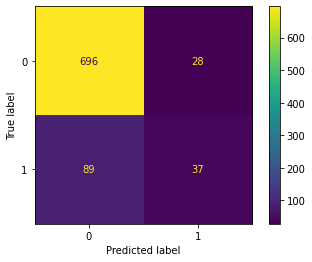

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92       724
           1       0.57      0.29      0.39       126

    accuracy                           0.86       850
   macro avg       0.73      0.63      0.65       850
weighted avg       0.84      0.86      0.84       850



In [73]:
#Logistic Regression
model = LogisticRegression(solver='liblinear')
model.fit(norm_x_train,y_train)


# test
prediction = model.predict(norm_x_test)
#print("classifier test prediction:", prediction)
print('classifier test accuracy:', accuracy_score(y_test, prediction))


cm = confusion_matrix(y_test, prediction)
print(cm)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])

cm_display.plot()
plt.show()
print("Classification Report:\n",classification_report(y_test,prediction))

## 2. Support Vector Machines

classifier test accuracy: 0.9047058823529411
[[716   8]
 [ 73  53]]


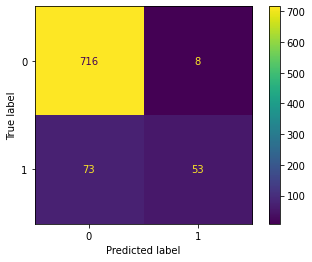

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95       724
           1       0.87      0.42      0.57       126

    accuracy                           0.90       850
   macro avg       0.89      0.70      0.76       850
weighted avg       0.90      0.90      0.89       850



In [151]:
model = SVC()
model.fit(norm_x_train,y_train)


# test
prediction = model.predict(norm_x_test)
#print("classifier test prediction:", prediction)
print('classifier test accuracy:', accuracy_score(y_test, prediction))


cm = confusion_matrix(y_test, prediction)
print(cm)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])

cm_display.plot()
plt.show()
print("Classification Report:\n",classification_report(y_test,prediction))

## 3. Random Forest

In [77]:
#Tuning the Gradient boosting model
model = RandomForestClassifier()
param_grid = {
    "n_estimators":[250,500,600,750,800,850,900],
    "max_depth":[1,3,5,7,9,11,13,15]
}
gridsearch = GridSearchCV(model, param_grid,cv=5)
gridsearch.fit(norm_x_train, y_train)
print('Best accuracy: %.3f' % gridsearch.best_score_)
print(gridsearch.best_params_)
n_estimators = gridsearch.best_params_['n_estimators']
max_depth = gridsearch.best_params_['max_depth']

Best accuracy: 0.939
{'max_depth': 15, 'n_estimators': 750}


classifier test accuracy: 0.9152941176470588
[[705  19]
 [ 53  73]]


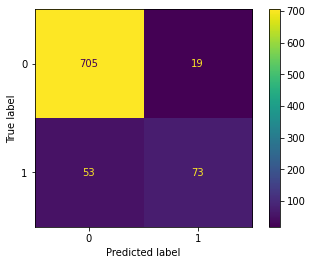

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       724
           1       0.79      0.58      0.67       126

    accuracy                           0.92       850
   macro avg       0.86      0.78      0.81       850
weighted avg       0.91      0.92      0.91       850



In [78]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=n_estimators,max_depth=max_depth)
model.fit(norm_x_train,y_train)


# test
prediction = model.predict(norm_x_test)
#print("classifier test prediction:", prediction)
print('classifier test accuracy:', accuracy_score(y_test, prediction))


cm = confusion_matrix(y_test, prediction)
print(cm)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])

cm_display.plot()
plt.show()
print("Classification Report:\n",classification_report(y_test,prediction))

## 4. Gradient Boosting

In [131]:
#Tuning the Gradient boosting model
from sklearn.ensemble import GradientBoostingClassifier
model1 = GradientBoostingClassifier()
param_grid = {
    "n_estimators":[500,600,700,750,800,850,950,1000],
    "max_depth":[5,7,9,11,13,15,17,19],
    "learning_rate":[0.01,0.1,1]
 
}
gridsearch = GridSearchCV(model1, param_grid,cv=5)
gridsearch.fit(norm_x_train, y_train)
print(gridsearch.best_params_)
n_estimators = gridsearch.best_params_['n_estimators']
max_depth = gridsearch.best_params_['max_depth']
learning_rate = gridsearch.best_params_['learning_rate']

{'n_estimators': 850, 'max_depth': 5, 'learning_rate': 0.1}

classifier test accuracy: 0.9458823529411765
[[704  20]
 [ 26 100]]


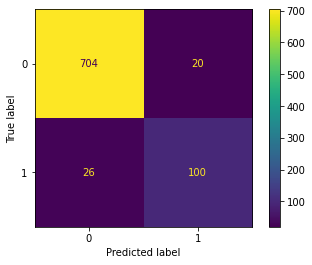

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97       724
           1       0.83      0.79      0.81       126

    accuracy                           0.95       850
   macro avg       0.90      0.88      0.89       850
weighted avg       0.94      0.95      0.95       850



In [134]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
GBmodel = GradientBoostingClassifier(n_estimators=n_estimators,max_depth=max_depth,learning_rate=learning_rate)
GBmodel.fit(norm_x_train,y_train)


# test
prediction = GBmodel.predict(norm_x_test)
#print("classifier test prediction:", prediction)
print('classifier test accuracy:', accuracy_score(y_test, prediction))


cm = confusion_matrix(y_test, prediction)
print(cm)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])

cm_display.plot()
plt.show()
print("Classification Report:\n",classification_report(y_test,prediction))

## 4. Neural Networks

In [135]:
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

# for modeling
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [136]:
# build a model
model = Sequential()
model.add(Dense(16, input_shape=(x.shape[1],), activation='relu')) 
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary() 

# compile the model
model.compile(optimizer='Adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])


es = EarlyStopping(monitor='val_accuracy', 
                                   mode='max',
                                   patience=10,
                                   restore_best_weights=True)

# now we just update our model fit call
history = model.fit(norm_x_train,
                    y_train,
                    callbacks=[es],
                    epochs=80, 
                    batch_size=10,
                    validation_split=0.2,
                    shuffle=True,
                    verbose=1)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                464       
                                                                 
 dense_7 (Dense)             (None, 64)                1088      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,617
Trainable params: 1,617
Non-trainable params: 0
_________________________________________________________________
Epoch 1/80
469/469 [==============================] - 2s 2ms/step - loss: 0.4672 - accuracy: 0.7865 - val_loss: 0.1775 - val_accuracy: 0.9420
Epoch 2/80
469/469 [==============================] - 1s 2ms/step - loss: 0.2532 - accuracy: 0.9069 - val_loss: 0.0719 - val_accuracy: 0.9735
Epoch 3/80
469/469 [============

27/27 [==============================] - 0s 1ms/step
classifier test accuracy: 0.908235294117647
[[690  34]
 [ 44  82]]


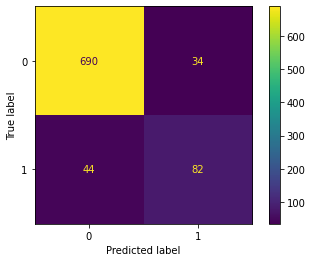

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.95       724
           1       0.71      0.65      0.68       126

    accuracy                           0.91       850
   macro avg       0.82      0.80      0.81       850
weighted avg       0.91      0.91      0.91       850



In [137]:
# test
prediction = np.round(model.predict(norm_x_test),0)
#print("classifier test prediction:", predictionprint

print('classifier test accuracy:', accuracy_score(y_test, prediction))


cm = confusion_matrix(y_test, prediction)
print(cm)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])

cm_display.plot()
plt.show()
print("Classification Report:\n",classification_report(y_test,prediction))

## 5. Extreme Learning Machines

In [138]:
#Elm
from sklearn.base import BaseEstimator, ClassifierMixin

#Reference : Li Xudong, from NSSC.CAS Beijing


import numpy as np
from scipy.linalg import pinv, inv
import time


class elm(BaseEstimator, ClassifierMixin):
    '''
    Function: elm class init
    -------------------
    Parameters:
    shape: list, shape[hidden units, output units]
        numbers of hidden units and output units
    activation_function: str, 'sigmoid', 'relu', 'sin', 'tanh' or 'leaky_relu'
        Activation function of neurals
    x: array, shape[samples, features]
        train data
    y: array, shape[samples, ]
        labels
    C: float
        regularization parameter
    one_hot: bool, Ture or False, default True
        The parameter is useful only it is a classification problem. If the labels need to transformed to
        one_hot, this parameter is set to be True
    random_type: str, 'uniform' or 'normal', default:'normal'
        Weight initialization method
    '''

    def __init__(self, hidden_units=32, C=0.1, one_hot=True,
                 random_type='normal', algorithm='no_re'):
        self.hidden_units = hidden_units
        self.random_type = random_type

        self.C = C
        self.algorithm = algorithm
        self.one_hot = one_hot

    # compute the output of hidden layer according to different activation function
    def __input2hidden(self, x):
        self.temH = np.dot(self.W, x.T) + self.b

        #Activation function is ReLU
        self.H = self.temH * (self.temH > 0)

        return self.H

    # compute the output
    def __hidden2output(self, H):
        self.output = np.dot(H.T, self.beta)
        return self.output

    '''
    Function: Train the model, compute beta matrix, the weight matrix from hidden layer to output layer
    ------------------
    Parameter:
    algorithm: str, 'no_re', 'solution1' or 'solution2'
        The algorithm to compute beta matrix
    ------------------
    Return:
    beta: array
        the weight matrix from hidden layer to output layer
    train_score: float
        the accuracy or RMSE
    train_time: str
        time of computing beta
    '''

    def fit(self, x, y):
        # Modified
        self.x = x
        self.y = y.values
        self.class_num = np.unique(self.y).shape[0]
        self.beta = np.zeros((self.hidden_units, self.class_num))
        # if classification problem and one_hot == True
        if self.one_hot:
            self.one_hot_label = np.zeros((self.y.shape[0], self.class_num))
            for i in range(self.y.shape[0]):
                self.one_hot_label[i, int(self.y[i])] = 1
        # Randomly generate the weight matrix and bias vector from input to hidden layer
        # 'uniform': uniform distribution
        # 'normal': normal distribution
        if self.random_type == 'uniform':
            self.W = np.random.uniform(low=0, high=1, size=(self.hidden_units, self.x.shape[1]))
            self.b = np.random.uniform(low=0, high=1, size=(self.hidden_units, 1))
        if self.random_type == 'normal':
            self.W = np.random.normal(loc=0, scale=0.5, size=(self.hidden_units, self.x.shape[1]))
            self.b = np.random.normal(loc=0, scale=0.5, size=(self.hidden_units, 1))

        # updated
        self.time1 = time.process_time()  # compute running time
        # modified
        self.H = self.__input2hidden(self.x)
        if self.one_hot:
            self.y_temp = self.one_hot_label
        else:
            self.y_temp = self.y
        # no regularization it uses Moore-Penrose inverse (NO backpropagation)
        if self.algorithm == 'no_re':
            self.beta = np.dot(pinv(self.H.T), self.y_temp)
        # faster algorithm 1
        if self.algorithm == 'solution1':
            self.tmp1 = inv(np.eye(self.H.shape[0]) / self.C + np.dot(self.H, self.H.T))
            self.tmp2 = np.dot(self.tmp1, self.H)
            self.beta = np.dot(self.tmp2, self.y_temp)
        # faster algorithm 2
        if self.algorithm == 'solution2':
            self.tmp1 = inv(np.eye(self.H.shape[0]) / self.C + np.dot(self.H, self.H.T))
            self.tmp2 = np.dot(self.H.T, self.tmp1)
            self.beta = np.dot(self.tmp2.T, self.y_temp)
        self.time2 = time.process_time()

        # compute the results
        self.result = self.__hidden2output(self.H)
        # If the problem if classification problem, the output is softmax
        
        self.result = np.exp(self.result) / np.sum(np.exp(self.result), axis=1).reshape(-1, 1)

        # Evaluate training results
        # If problem is classification, compute the accuracy
        # If problem is regression, compute the RMSE
    
        self.y_ = np.where(self.result == np.max(self.result, axis=1).reshape(-1, 1))[1]
        self.correct = 0
        for i in range(self.y.shape[0]):
            if self.y_[i] == self.y[i]:
                self.correct += 1
        self.train_score = self.correct / self.y.shape[0]
        
        train_time = str(self.time2 - self.time1)
        return self.beta, self.train_score, train_time

    '''
    Function: compute the result given data
    ---------------
    Parameters:
    x: array, shape[samples, features]
    ---------------
    Return:
    y_: array
        predicted results
    '''

    def predict(self, x):
        # Inserted Error case
        # try:
        #     getattr(self, "treshold_")
        # except AttributeError:
        #     raise RuntimeError("You must train classifer before predicting data!")
        self.H = self.__input2hidden(x)
        self.y_ = self.__hidden2output(self.H)

        self.y_ = np.where(self.y_ == np.max(self.y_, axis=1).reshape(-1, 1))[1]

        return self.y_

    '''
    Function: compute accuracy or RMSE given data and labels
    -------------
    Parameters:
    x: array, shape[samples, features]
    y: array, shape[samples, ]
    -------------
    Return:
    test_score: float, accuracy or RMSE
    '''

    def score(self, x, y):
        self.prediction = self.predict(x)
        # updated
        y = y.values

        self.correct = 0
        for i in range(y.shape[0]):
            if self.prediction[i] == y[i]:
                self.correct += 1
        self.test_score = self.correct / y.shape[0]
        

        return self.test_score

In [142]:
#Tuning the elm model
model = elm()
param_grid = {'hidden_units': [2 ** i for i in range(1, 10)]}
gridsearch = GridSearchCV(model, param_grid,cv=5)
gridsearch.fit(norm_x_train, y_train)
print('Best accuracy: %.3f' % gridsearch.best_score_)
print(gridsearch.best_params_)
hidden_units = gridsearch.best_params_['hidden_units']

Best accuracy: 0.897
{'hidden_units': 256}


classifier train accuracy: 0.9279371584699454
classifier running time: 0.734375
classifier test accuracy: 0.8788235294117647
[[695  29]
 [ 74  52]]


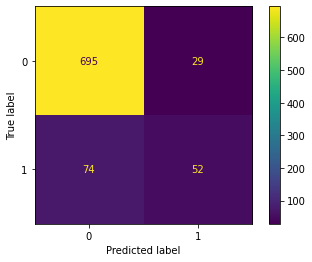

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       724
           1       0.64      0.41      0.50       126

    accuracy                           0.88       850
   macro avg       0.77      0.69      0.72       850
weighted avg       0.86      0.88      0.87       850



In [147]:
model = elm(hidden_units=hidden_units)

beta, train_accuracy, running_time = model.fit(norm_x_train,y_train)
#print("classifier beta:\n", beta)
print("classifier train accuracy:", train_accuracy)
print('classifier running time:', running_time)

# test
prediction = model.predict(norm_x_test)
#print("classifier test prediction:", prediction)
print('classifier test accuracy:', model.score(norm_x_test, y_test))


cm = confusion_matrix(y_test, prediction)
print(cm)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])

cm_display.plot()
plt.show()

print("Classification Report:\n",classification_report(y_test,prediction))

# Applying the model on test data of competition

In [114]:
data_test = pd.read_csv('test.csv')

In [115]:
data_test

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,746,GA,130,area_code_415,no,no,0,119.4,99,20.30,226.3,97,19.24,202.7,111,9.12,11.3,7,3.05,0
746,747,WA,73,area_code_408,no,no,0,177.2,118,30.12,270.5,84,22.99,241.8,112,10.88,12.3,2,3.32,3
747,748,WV,152,area_code_415,no,no,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3
748,749,DC,61,area_code_415,no,no,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1


In [116]:
#Encoding the categorical features

#International plan
data_test.international_plan.replace(['no', 'yes'], [0, 1], inplace=True)

#Voice mail plan
data_test.voice_mail_plan.replace(['no', 'yes'], [0, 1], inplace=True)



In [117]:
data_test = pd.get_dummies(data_test,prefix='',prefix_sep='', columns = ['area_code'])
data_test

,id,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,area_code_408,area_code_415,area_code_510
0,1,KS,128,0,1,25,265.1,110,45.07,197.4,...,244.7,91,11.01,10.0,3,2.70,1,0,1,0
1,2,AL,118,1,0,0,223.4,98,37.98,220.6,...,203.9,118,9.18,6.3,6,1.70,0,0,0,1
2,3,IA,62,0,0,0,120.7,70,20.52,307.2,...,203.0,99,9.14,13.1,6,3.54,4,0,1,0
3,4,VT,93,0,0,0,190.7,114,32.42,218.2,...,129.6,121,5.83,8.1,3,2.19,3,0,0,1
4,5,NE,174,0,0,0,124.3,76,21.13,277.1,...,250.7,115,11.28,15.5,5,4.19,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,746,GA,130,0,0,0,119.4,99,20.30,226.3,...,202.7,111,9.12,11.3,7,3.05,0,0,1,0
746,747,WA,73,0,0,0,177.2,118,30.12,270.5,...,241.8,112,10.88,12.3,2,3.32,3,1,0,0
747,748,WV,152,0,0,0,184.2,90,31.31,256.8,...,213.6,113,9.61,14.7,2,3.97,3,0,1,0
748,749,DC,61,0,0,0,140.6,89,23.90,172.8,...,212.4,97,9.56,13.6,4,3.67,1,0,1,0


In [118]:
data_test = ce_hashing.transform(data_test)
data_test

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,id,account_length,...,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,area_code_408,area_code_415,area_code_510
0,0,1,0,0,0,0,0,0,1,128,...,244.7,91,11.01,10.0,3,2.70,1,0,1,0
1,0,1,0,0,0,0,0,0,2,118,...,203.9,118,9.18,6.3,6,1.70,0,0,0,1
2,0,0,0,0,0,0,0,1,3,62,...,203.0,99,9.14,13.1,6,3.54,4,0,1,0
3,0,0,0,0,1,0,0,0,4,93,...,129.6,121,5.83,8.1,3,2.19,3,0,0,1
4,1,0,0,0,0,0,0,0,5,174,...,250.7,115,11.28,15.5,5,4.19,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0,1,0,0,0,0,0,0,746,130,...,202.7,111,9.12,11.3,7,3.05,0,0,1,0
746,0,0,1,0,0,0,0,0,747,73,...,241.8,112,10.88,12.3,2,3.32,3,1,0,0
747,0,0,0,0,0,0,1,0,748,152,...,213.6,113,9.61,14.7,2,3.97,3,0,1,0
748,0,0,0,1,0,0,0,0,749,61,...,212.4,97,9.56,13.6,4,3.67,1,0,1,0


In [119]:
id = data_test['id']
data_test = data_test.drop(['id'],axis='columns')
norm_data_test = pd.DataFrame(train_scaler.transform(data_test),
                                   index=data_test.index, columns=data_test.columns)
norm_data_test 

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,account_length,international_plan,...,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,area_code_408,area_code_415,area_code_510
0,-0.330289,2.718397,-0.221554,-0.266012,-0.347513,-0.1895,-0.336298,-0.252508,0.720235,-0.314144,...,0.837539,-0.443064,0.836782,-0.152914,-0.477375,-0.153650,-0.484801,-0.462254,1.273766,-0.454890
1,-0.330289,2.718397,-0.221554,-0.266012,-0.347513,-0.1895,-0.336298,-0.252508,0.457134,3.183250,...,0.006980,0.995263,0.008969,-1.576484,0.784895,-1.578760,-1.190317,-0.462254,-0.785073,2.198333
2,-0.330289,-0.367864,-0.221554,-0.266012,-0.347513,-0.1895,-0.336298,3.960273,-1.016233,-0.314144,...,-0.011341,-0.016893,-0.009126,1.039807,0.784895,1.043441,1.631747,-0.462254,1.273766,-0.454890
3,-0.330289,-0.367864,-0.221554,-0.266012,2.877587,-0.1895,-0.336298,-0.252508,-0.200619,-0.314144,...,-1.505534,1.155077,-1.506426,-0.883937,-0.477375,-0.880456,0.926231,-0.462254,-0.785073,2.198333
4,3.027650,-0.367864,-0.221554,-0.266012,-0.347513,-0.1895,-0.336298,-0.252508,1.930501,-0.314144,...,0.959680,0.835449,0.958918,1.963204,0.364139,1.969762,0.926231,-0.462254,1.273766,-0.454890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,-0.330289,2.718397,-0.221554,-0.266012,-0.347513,-0.1895,-0.336298,-0.252508,0.772855,-0.314144,...,-0.017448,0.622363,-0.018173,0.347259,1.205652,0.345138,-1.190317,-0.462254,1.273766,-0.454890
746,-0.330289,-0.367864,4.513564,-0.266012,-0.347513,-0.1895,-0.336298,-0.252508,-0.726822,-0.314144,...,0.778504,0.675635,0.777975,0.732008,-0.898132,0.729917,0.926231,2.163313,-0.785073,-0.454890
747,-0.330289,-0.367864,-0.221554,-0.266012,-0.347513,-0.1895,2.973553,-0.252508,1.351678,-0.314144,...,0.204441,0.728906,0.203482,1.655405,-0.898132,1.656238,0.926231,-0.462254,1.273766,-0.454890
748,-0.330289,-0.367864,-0.221554,3.759226,-0.347513,-0.1895,-0.336298,-0.252508,-1.042543,-0.314144,...,0.180013,-0.123436,0.180864,1.232182,-0.056618,1.228705,-0.484801,-0.462254,1.273766,-0.454890


In [148]:
#Using the Model From Gradient Boosting
predictions = pd.DataFrame(GBmodel.predict(norm_data_test),index=data_test.index,columns=['churn'])
predictions.churn.replace([0, 1], ['no', 'yes'], inplace=True)
predictions['id'] = id
predictions = predictions[['id','churn']]
predictions

,id,churn
0,1,no
1,2,no
2,3,yes
3,4,no
4,5,no
...,...,...
745,746,no
746,747,no
747,748,no
748,749,no


In [149]:
predictions.to_csv('submission.csv',index=False)

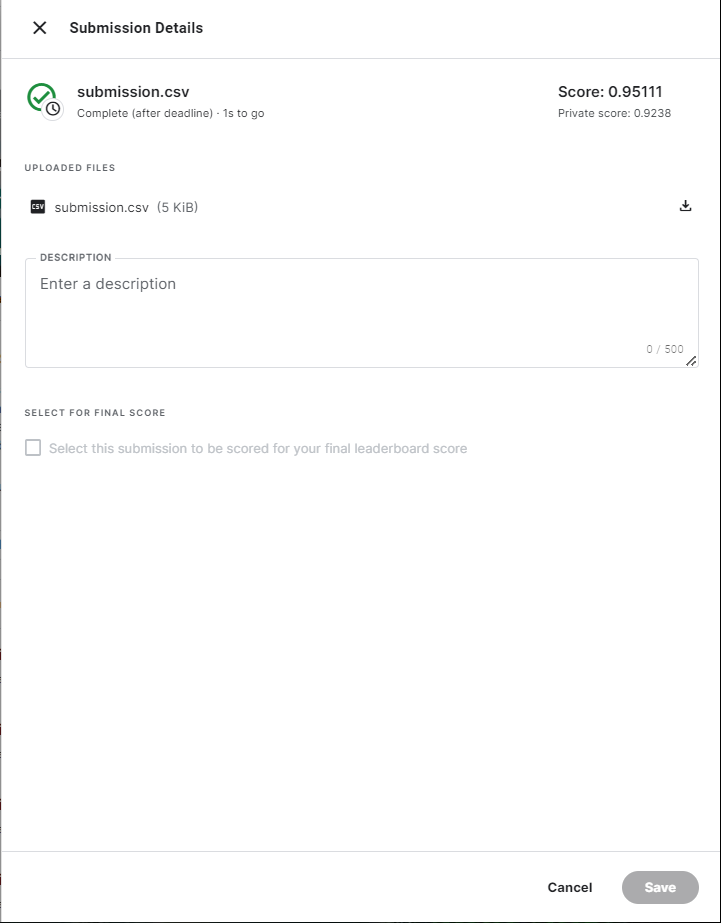

In [150]:
from IPython.display import Image
Image(filename='kaggle_submission_afterImblanceSol.png') 

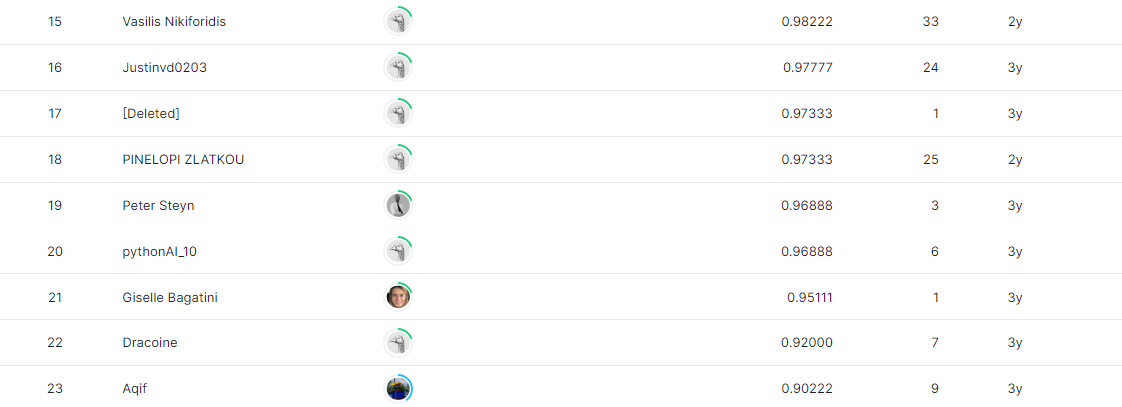

In [67]:
Image(filename='public.png')

In public submissions, our rank would be 22

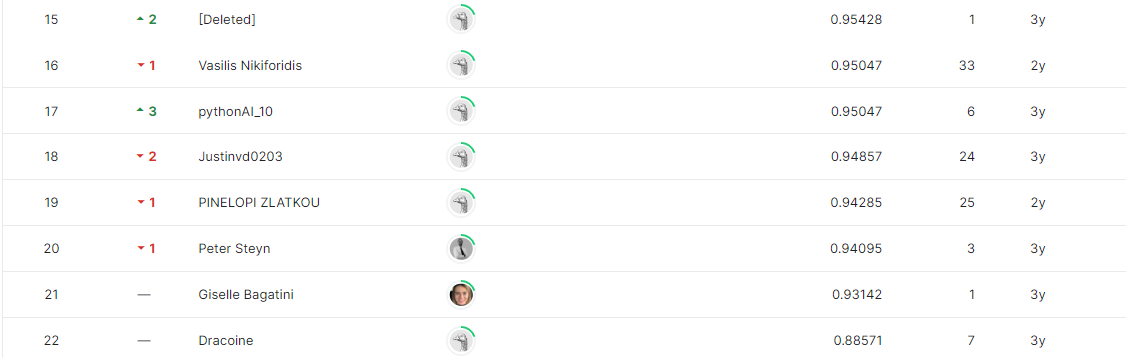

In [69]:
Image(filename='private.png')

In private ranks, our submission would have got 21st place